In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from config import gkey
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Create dataframes from CSV files
dice_data_df = pd.read_csv('Resources/dice_data.csv')
city_locations_df = pd.read_csv('Resources/city_locations.csv')

In [3]:
# Clean up dataframe
# dice_data_df.describe()
dice_data_df = dice_data_df[['jobtitle','jobdescription','employmenttype_jobstatus',
                             'company','joblocation_address','shift','skills']]

In [4]:
# Filter dataframe
dice_data_df[['joblocation_address','State','Zip Code']] = dice_data_df['joblocation_address'].str.split(',',expand=True)

dice_data_df = dice_data_df[['jobtitle','jobdescription','employmenttype_jobstatus',
                             'company','joblocation_address','State','shift','skills']]

dice_data_df = dice_data_df.rename(columns = {
    'jobtitle': 'Job Title',
    'jobdescription': 'Job Description',
    'employmenttype_jobstatus': 'Employment Type',
    'company': 'Company',
    'joblocation_address': 'City',
    'State': 'State',
    'shift': 'Shift',
    'skills': 'Skills'
})

dice_data_df.head()

,Job Title,Job Description,Employment Type,Company,City,State,Shift,Skills
0,AUTOMATION TEST ENGINEER,Looking for Selenium engineers...must have sol...,"C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...","Digital Intelligence Systems, LLC",Atlanta,GA,Telecommuting not available|Travel not required,SEE BELOW
1,Information Security Engineer,The University of Chicago has a rapidly growin...,Full Time,University of Chicago/IT Services,Chicago,IL,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo..."
2,Business Solutions Architect,"GalaxE.SolutionsEvery day, our solutions affec...",Full Time,"Galaxy Systems, Inc.",Schaumburg,IL,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in..."
3,"Java Developer (mid level)- FT- GREAT culture,...",Java DeveloperFull-time/direct-hireBolingbrook...,Full Time,TransTech LLC,Bolingbrook,IL,Telecommuting not available|Travel not required,Please see job description
4,DevOps Engineer,Midtown based high tech firm has an immediate ...,Full Time,Matrix Resources,Atlanta,GA,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma..."


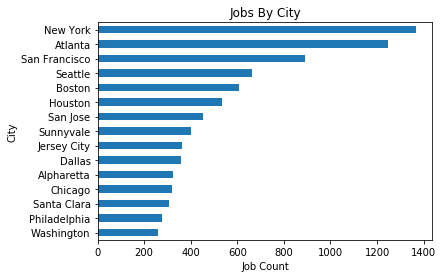

In [5]:
# Get job counts by city
city_jobs_df = pd.DataFrame(dice_data_df['City'].value_counts().reset_index())
city_jobs_df.columns = ['City', 'Job Count']
most_city_jobs_df = city_jobs_df.nlargest(15,['Job Count'])
most_city_jobs_df.sort_values('Job Count',ascending=True,inplace=True)

most_city_jobs_plot = most_city_jobs_df.plot.barh(x='City',y='Job Count')
most_city_jobs_plot.set_xlabel("Job Count")
most_city_jobs_plot.set_ylabel("City")
most_city_jobs_plot.set_title("Jobs By City")
most_city_jobs_plot.get_legend().remove()
plt.show()

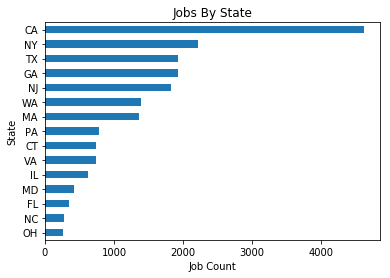

In [6]:
# Get job counts by State
dice_data_df['State'] = dice_data_df['State'].str.strip()

dice_data_df['State'] = dice_data_df['State'].replace(
    {'Springs':'CO','Washington':'WA','Texas': 'TX','Pa':'PA','Oh':'OH', 'Va':'VA', 'Md':'MD', 'Dc':'DC'})

dice_data_df['City'] = dice_data_df['City'].replace(
    {'Colorado':'Springs'})

dice_data_df = dice_data_df.loc[dice_data_df["State"].notnull(), :]

state_jobs_df = pd.DataFrame(dice_data_df['State'].value_counts().reset_index())
state_jobs_df.columns = ['State', 'Job Count']
most_state_jobs_df = state_jobs_df.nlargest(15,['Job Count'])
most_state_jobs_df.sort_values('Job Count',ascending=True,inplace=True)

most_state_jobs_plot = most_state_jobs_df.plot.barh(x='State',y='Job Count')
most_state_jobs_plot.set_xlabel("Job Count")
most_state_jobs_plot.set_ylabel("State")
most_state_jobs_plot.set_title("Jobs By State")
most_state_jobs_plot.get_legend().remove()
plt.show()

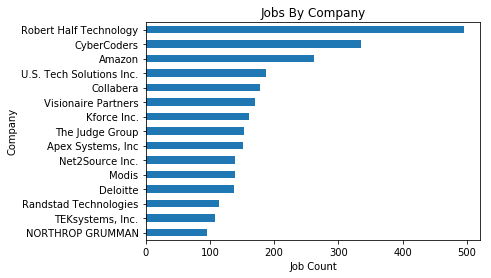

In [7]:
# Get job counts by company
dice_data_df['Company'] = dice_data_df['Company'].replace({'Robert Half': 'Robert Half Technology'})

company_jobs_df = pd.DataFrame(dice_data_df['Company'].value_counts().reset_index())
company_jobs_df.columns = ['Company', 'Job Count']
most_company_jobs_df = company_jobs_df.nlargest(15,['Job Count'])
most_company_jobs_df.sort_values('Job Count',inplace=True)
most_company_jobs_df

most_company_jobs_plot = most_company_jobs_df.plot.barh(x='Company',y='Job Count')
most_company_jobs_plot.set_xlabel("Job Count")
most_company_jobs_plot.set_ylabel("Company")
most_company_jobs_plot.set_title("Jobs By Company")
most_company_jobs_plot.get_legend().remove()
plt.show()

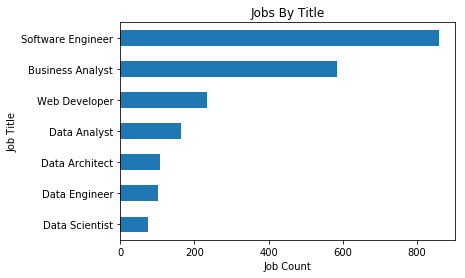

In [8]:
# Get job counts by title
dice_data_analyst = dice_data_df[dice_data_df['Job Title'].str.contains('Data Analyst')]
dice_data_scientist = dice_data_df[dice_data_df['Job Title'].str.contains('Data Scientist')]
dice_data_engineer = dice_data_df[dice_data_df['Job Title'].str.contains('Data Engineer')]
dice_data_architect = dice_data_df[dice_data_df['Job Title'].str.contains('Data Architect')]
dice_software_engineer = dice_data_df[dice_data_df['Job Title'].str.contains('Software Engineer')]
dice_web_developer = dice_data_df[dice_data_df['Job Title'].str.contains('Web Developer')]
dice_business_analyst = dice_data_df[dice_data_df['Job Title'].str.contains('Business Analyst')]

dice_job_titles_df = pd.DataFrame({
    "Job Title": ["Data Analyst","Data Scientist","Data Engineer","Data Architect","Software Engineer","Web Developer","Business Analyst"],
    "Job Count": [len(dice_data_analyst),len(dice_data_scientist),len(dice_data_engineer),len(dice_data_architect),len(dice_software_engineer),len(dice_web_developer),len(dice_business_analyst)]
})

dice_job_titles_df.sort_values('Job Count',inplace=True)

job_title_plot = dice_job_titles_df.plot.barh(x='Job Title',y='Job Count')
job_title_plot.set_xlabel("Job Count")
job_title_plot.set_ylabel("Job Title")
job_title_plot.set_title("Jobs By Title")
job_title_plot.get_legend().remove()
plt.show()

In [9]:
# Most relevant skills for tech jobs
skills_values = ['java','sql','javascript','linux','html','python','css','c#','oracle','aws','c++','xml','api',
'r','hadoop','spark','sas','tableau','hive','scala','aws','matlab','c','excel','azure','agile']

In [10]:
# Skills by total jobs
dice_data_skills_df = dice_data_df
dice_data_skills_df['Skills'] = dice_data_skills_df['Skills'].astype(str)
dice_data_skills_cu_df = dice_data_skills_df['Skills'].str.lower().str.split(',', expand=True)
dice_data_skills_cu_df[dice_data_skills_cu_df.columns] = dice_data_skills_cu_df.apply(lambda x: x.str.strip()) 
dice_data_skills_df = dice_data_skills_cu_df.stack().reset_index()
dice_data_skills_df.columns = ['Level 1','Level 2','Skill']
dice_data_skills_filtered_df = dice_data_skills_df[dice_data_skills_df.Skill.isin(skills_values)].reset_index()

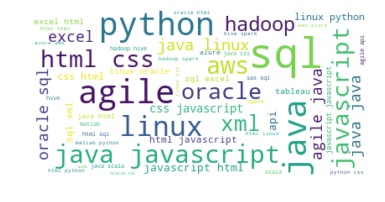

In [11]:
# Wordcloud for most popular skills by jobs
text2 = dice_data_skills_filtered_df
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text2['Skill']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

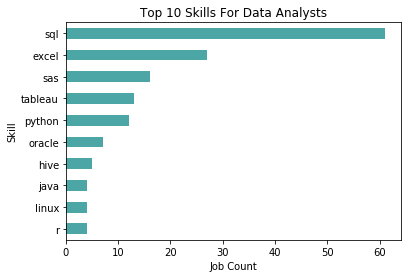

In [15]:
# Top skills for data analysts
data_analyst_skills_raw_df = dice_data_analyst['Skills'].str.lower().str.split(',', expand=True)
data_analyst_skills_raw_df[data_analyst_skills_raw_df.columns] = data_analyst_skills_raw_df.apply(lambda x: x.str.strip()) 
data_analyst_skills_df = data_analyst_skills_raw_df.stack().value_counts().reset_index()
data_analyst_skills_df.columns = ['Skill','Data Analyst Job Count']
data_analyst_skills_filtered_df = data_analyst_skills_df[data_analyst_skills_df.Skill.isin(skills_values)]

data_analyst_skills_filtered_plot_df = data_analyst_skills_filtered_df.nlargest(10,['Data Analyst Job Count'])
data_analyst_skills_filtered_plot_df.sort_values('Data Analyst Job Count',inplace=True)
data_analyst_skills_filtered_plot = data_analyst_skills_filtered_plot_df.plot.barh(x='Skill',y='Data Analyst Job Count',alpha=0.7,color='teal',align='center')
data_analyst_skills_filtered_plot.set_xlabel("Job Count")
data_analyst_skills_filtered_plot.set_ylabel("Skill")
data_analyst_skills_filtered_plot.set_title("Top 10 Skills For Data Analysts")
data_analyst_skills_filtered_plot.get_legend().remove()
plt.show()

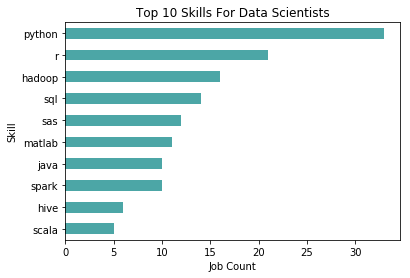

In [16]:
# Top skills for data scientists
data_scientist_skills_raw_df = dice_data_scientist['Skills'].str.lower().str.split(',', expand=True)
data_scientist_skills_raw_df[data_scientist_skills_raw_df.columns] = data_scientist_skills_raw_df.apply(lambda x: x.str.strip()) 
data_scientist_skills_df = data_scientist_skills_raw_df.stack().value_counts().reset_index()
data_scientist_skills_df.columns = ['Skill','Data Scientist Job Count']
data_scientist_skills_filtered_df = data_scientist_skills_df[data_scientist_skills_df.Skill.isin(skills_values)]

data_scientist_skills_filtered_plot_df = data_scientist_skills_filtered_df.nlargest(10,['Data Scientist Job Count'])
data_scientist_skills_filtered_plot_df.sort_values('Data Scientist Job Count',inplace=True)
data_scientist_skills_filtered_plot = data_scientist_skills_filtered_plot_df.plot.barh(x='Skill',y='Data Scientist Job Count',alpha=0.7,color='teal',align='center')
data_scientist_skills_filtered_plot.set_xlabel("Job Count")
data_scientist_skills_filtered_plot.set_ylabel("Skill")
data_scientist_skills_filtered_plot.set_title("Top 10 Skills For Data Scientists")
data_scientist_skills_filtered_plot.get_legend().remove()
plt.show()

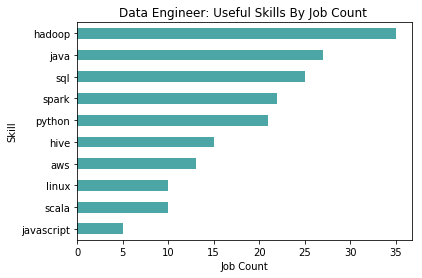

In [17]:
# Top skills for data engineers
data_engineer_skills_raw_df = dice_data_engineer['Skills'].str.lower().str.split(',', expand=True)
data_engineer_skills_raw_df[data_engineer_skills_raw_df.columns] = data_engineer_skills_raw_df.apply(lambda x: x.str.strip()) 
data_engineer_skills_df = data_engineer_skills_raw_df.stack().value_counts().reset_index()
data_engineer_skills_df.columns = ['Skill','Data Engineer Job Count']
data_engineer_skills_filtered_df = data_engineer_skills_df[data_engineer_skills_df.Skill.isin(skills_values)]

data_engineer_skills_filtered_plot_df = data_engineer_skills_filtered_df.nlargest(10,['Data Engineer Job Count'])
data_engineer_skills_filtered_plot_df.sort_values('Data Engineer Job Count',inplace=True)
data_engineer_skills_filtered_plot = data_engineer_skills_filtered_plot_df.plot.barh(x='Skill',y='Data Engineer Job Count',alpha=0.7,color='teal',align='center')
data_engineer_skills_filtered_plot.set_xlabel("Job Count")
data_engineer_skills_filtered_plot.set_ylabel("Skill")
data_engineer_skills_filtered_plot.set_title("Data Engineer: Useful Skills By Job Count ")
data_engineer_skills_filtered_plot.get_legend().remove()
plt.show()

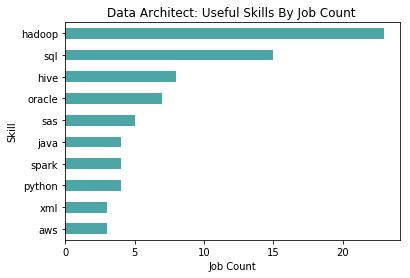

In [18]:
# Top skills for data architects
data_architect_skills_raw_df = dice_data_architect['Skills'].str.lower().str.split(',', expand=True)
data_architect_skills_raw_df[data_architect_skills_raw_df.columns] = data_architect_skills_raw_df.apply(lambda x: x.str.strip()) 
data_architect_skills_df = data_architect_skills_raw_df.stack().value_counts().reset_index()
data_architect_skills_df.columns = ['Skill','Data Architect Job Count']
data_architect_skills_filtered_df = data_architect_skills_df[data_architect_skills_df.Skill.isin(skills_values)]

data_architect_skills_filtered_plot_df = data_architect_skills_filtered_df.nlargest(10,['Data Architect Job Count'])
data_architect_skills_filtered_plot_df.sort_values('Data Architect Job Count',inplace=True)
data_architect_skills_filtered_plot = data_architect_skills_filtered_plot_df.plot.barh(x='Skill',y='Data Architect Job Count',alpha=0.7,color='teal',align='center')
data_architect_skills_filtered_plot.set_xlabel("Job Count")
data_architect_skills_filtered_plot.set_ylabel("Skill")
data_architect_skills_filtered_plot.set_title("Data Architect: Useful Skills By Job Count ")
data_architect_skills_filtered_plot.get_legend().remove()
plt.show()

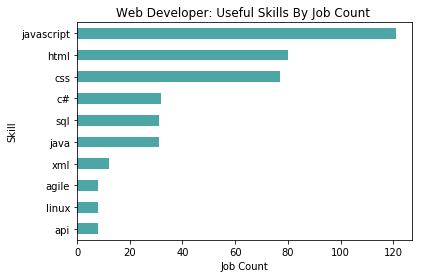

In [19]:
# # Top skills for web developers
web_developer_skills_raw_df = dice_web_developer['Skills'].str.lower().str.split(',', expand=True)
web_developer_skills_raw_df[web_developer_skills_raw_df.columns] = web_developer_skills_raw_df.apply(lambda x: x.str.strip()) 
web_developer_skills_df = web_developer_skills_raw_df.stack().value_counts().reset_index()
web_developer_skills_df.columns = ['Skill','Web Developer Job Count']
web_developer_skills_filtered_df = web_developer_skills_df[web_developer_skills_df.Skill.isin(skills_values)]

web_developer_skills_filtered_plot_df = web_developer_skills_filtered_df.nlargest(10,['Web Developer Job Count'])
web_developer_skills_filtered_plot_df.sort_values('Web Developer Job Count',inplace=True)
web_developer_skills_filtered_plot = web_developer_skills_filtered_plot_df.plot.barh(x='Skill',y='Web Developer Job Count',alpha=0.7,color='teal',align='center')
web_developer_skills_filtered_plot.set_xlabel("Job Count")
web_developer_skills_filtered_plot.set_ylabel("Skill")
web_developer_skills_filtered_plot.set_title("Web Developer: Useful Skills By Job Count ")
web_developer_skills_filtered_plot.get_legend().remove()
plt.show()

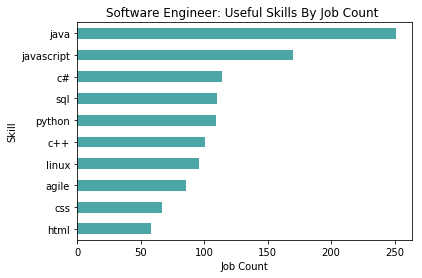

In [20]:
# Top skills for software engineers
software_engineer_skills_raw_df = dice_software_engineer['Skills'].str.lower().str.split(',', expand=True)
software_engineer_skills_raw_df[software_engineer_skills_raw_df.columns] = software_engineer_skills_raw_df.apply(lambda x: x.str.strip()) 
software_engineer_skills_df = software_engineer_skills_raw_df.stack().value_counts().reset_index()
software_engineer_skills_df.columns = ['Skill','Software Engineer Job Count']
software_engineer_skills_filtered_df = software_engineer_skills_df[software_engineer_skills_df.Skill.isin(skills_values)]

software_engineer_skills_filtered_plot_df = software_engineer_skills_filtered_df.nlargest(10,['Software Engineer Job Count'])
software_engineer_skills_filtered_plot_df.sort_values('Software Engineer Job Count',inplace=True)
software_engineer_skills_filtered_plot = software_engineer_skills_filtered_plot_df.plot.barh(x='Skill',y='Software Engineer Job Count',alpha=0.7,color='teal',align='center')
software_engineer_skills_filtered_plot.set_xlabel("Job Count")
software_engineer_skills_filtered_plot.set_ylabel("Skill")
software_engineer_skills_filtered_plot.set_title("Software Engineer: Useful Skills By Job Count ")
software_engineer_skills_filtered_plot.get_legend().remove()
plt.show()

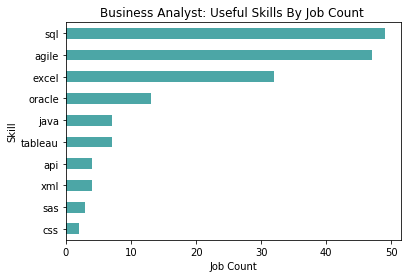

In [21]:
# Top skills for business analysts
business_analyst_skills_raw_df = dice_business_analyst['Skills'].str.lower().str.split(',', expand=True)
business_analyst_skills_raw_df[business_analyst_skills_raw_df.columns] = business_analyst_skills_raw_df.apply(lambda x: x.str.strip()) 
business_analyst_skills_df = business_analyst_skills_raw_df.stack().value_counts().reset_index()
business_analyst_skills_df.columns = ['Skill','Business Analyst Job Count']
business_analyst_skills_filtered_df = business_analyst_skills_df[business_analyst_skills_df.Skill.isin(skills_values)]

business_analyst_skills_filtered_plot_df = business_analyst_skills_filtered_df.nlargest(10,['Business Analyst Job Count'])
business_analyst_skills_filtered_plot_df.sort_values('Business Analyst Job Count',inplace=True)
business_analyst_skills_filtered_plot = business_analyst_skills_filtered_plot_df.plot.barh(x='Skill',y='Business Analyst Job Count',alpha=0.7,color='teal',align='center')
business_analyst_skills_filtered_plot.set_xlabel("Job Count")
business_analyst_skills_filtered_plot.set_ylabel("Skill")
business_analyst_skills_filtered_plot.set_title("Business Analyst: Useful Skills By Job Count ")
business_analyst_skills_filtered_plot.get_legend().remove()
plt.show()

In [10]:
location_data_df = pd.merge(dice_data_df, city_locations_df, how='left', on=['City', 'State'])
location_data_df = location_data_df.loc[location_data_df["Lat"].notnull(), :]

location_job_count = location_data_df.groupby(['Lat','Lng']).count().reset_index()
location_job_count_df = pd.DataFrame({
    "Lat": location_job_count['Lat'],
    "Lng": location_job_count['Lng'],
    "Job Count": location_job_count['Job Title']
})

# Store latitude and longitude in locations
locations = location_job_count_df[["Lat", "Lng"]]

# Convert to float
jobs = location_job_count_df["Job Count"].astype(float)

In [11]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=jobs, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))